In [1]:
import networkx
import matplotlib.pyplot as plt
from networkx.utils import powerlaw_sequence

900 0.5536585459829341
dict_values([30, 33, 17, 27, 13, 5, 7, 7, 1, 3, 63, 61, 68, 52, 51, 33, 45, 28, 25, 22, 17, 16, 16, 12, 17, 28, 32, 15, 14, 12, 17, 26, 32, 33, 29, 35, 27, 14, 28, 14, 12, 16, 16, 14, 20, 24, 19, 19, 20, 16, 16, 13, 12, 14, 17, 15, 13, 12, 18, 11, 11, 14, 14, 15, 14, 13, 13, 11, 11, 15, 13, 10, 12, 13, 11, 12, 11, 12, 10, 10, 11, 12, 13, 12, 12, 10, 11, 10, 10, 10, 11, 10, 10, 10, 10, 10, 11, 10, 10, 10])
[0.5057471264367817, 0.4375, 0.7279411764705882, 0.41025641025641024, 0.7435897435897436, 0.8, 0.8571428571428571, 0.8095238095238095, 0.0, 1.0, 0.22427035330261136, 0.22896174863387977, 0.2212467076382792, 0.25867269984917046, 0.27372549019607845, 0.39015151515151514, 0.29797979797979796, 0.5026455026455027, 0.44, 0.6363636363636364, 0.6323529411764706, 0.675, 0.7, 0.8484848484848485, 0.6764705882352942, 0.22486772486772486, 0.3911290322580645, 0.7333333333333333, 0.7692307692307693, 0.8181818181818182, 0.6176470588235294, 0.4338461538461538, 0.4576612903225806

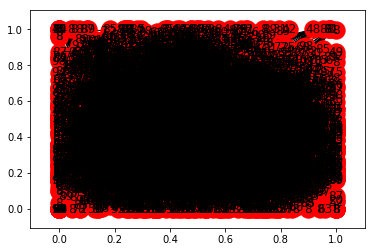

In [44]:
G = networkx.powerlaw_cluster_graph(100, 10, 1)
clust_list_hk = []
av_clust_hk = 0

for i in range(100):
    networkx.draw_networkx(G)
    av_clust_hk = av_clust_hk + networkx.average_clustering(G)
    
av_clust_hk = av_clust_hk / 100

print(G.number_of_edges(), av_clust_hk)
print(G.degree().values())

for i in range(100):
    clust = networkx.clustering(G,i)
    clust_list_hk.append(clust)

767 0.23633932716300546


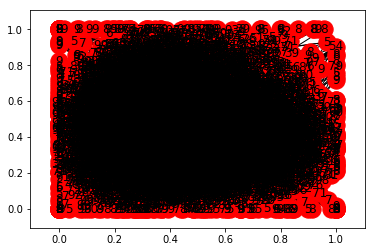

In [45]:
z = [30, 33, 17, 27, 13, 5, 7, 7, 1, 3, 63, 61, 68, 52, 51, 33, 45, 28, 25, 22, 17, 16, 16, 12, 17, 28, 32, 15, 14, 12, 17, 26, 32, 33, 29, 35, 27, 14, 28, 14, 12, 16, 16, 14, 20, 24, 19, 19, 20, 16, 16, 13, 12, 14, 17, 15, 13, 12, 18, 11, 11, 14, 14, 15, 14, 13, 13, 11, 11, 15, 13, 10, 12, 13, 11, 12, 11, 12, 10, 10, 11, 12, 13, 12, 12, 10, 11, 10, 10, 10, 11, 10, 10, 10, 10, 10, 11, 10, 10, 10]
G = networkx.configuration_model(z)
clust_list_config = []

# remove parallel edges
G = networkx.Graph(G)
# remove self loops
G.remove_edges_from(G.selfloop_edges())

av_clust_config = 0

for i in range(100):
    networkx.draw_networkx(G)
    av_clust_config = av_clust_config + networkx.average_clustering(G)

av_clust_config = av_clust_config / 100

print(G.number_of_edges(), av_clust_config)
for i in range(100):
    clust = networkx.clustering(G,i)
    clust_list_config.append(clust)

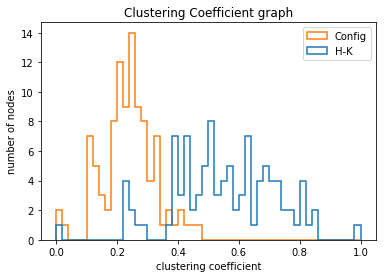

In [69]:
%matplotlib inline
from matplotlib.legend_handler import HandlerLine2D

plt.ylabel('number of nodes')
plt.xlabel('clustering coefficient')
_ = plt.hist([
    list(clust_list_hk),
    [list(clust_list_config)]
], bins=50, histtype='step', linewidth=1.5)
labels = 'Config', 'H-K'
plt.legend(labels)
plt.title('Clustering Coefficient graph')

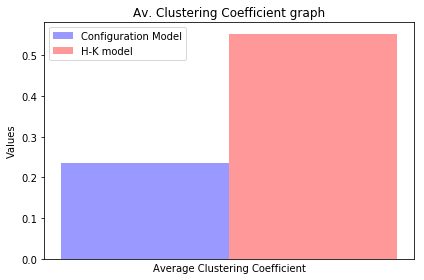

In [67]:
import numpy as np
import matplotlib.pyplot as plt


n_groups = 1

means_men = (av_clust_config)

means_women = (av_clust_hk)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 1

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, means_men, bar_width,
                 alpha=opacity,
                 color='b',
                 error_kw=error_config,
                 label='Configuration Model')

rects2 = plt.bar(index+bar_width, means_women, bar_width,
                 alpha=opacity,
                 color='r',
                 error_kw=error_config,
                 label='H-K model')

plt.xlabel('Average Clustering Coefficient')
plt.ylabel('Values')
plt.title('Av. Clustering Coefficient graph')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off') # labels along the bottom edge are off
plt.legend()

plt.tight_layout()
plt.show()